# Lab 8: Define and Solve an ML Problem of Your Choosing

# import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

# In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

# Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [10]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)# YOUR CODE HERE

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


# Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

# <Double click this Markdown cell to make it editable, and record your answers here.>

1. The dataset I have chosen is the bookReviewDataSet
2. I will be prediciting if the book review is positive or negative and the label is PositiveReview 
3. This is a supervised learning problem and it's a binary classification problem 
4. My features currently are the paragraphs that are provided. 
5. This is an important problem since bookstores want to make the most profit and that's done by selling books that have the most positive reviews. A model like this could automate the process of reading an author's review and storing how many of those are positive and negative. Then, the model could report some sort of metric that tells the bookstore which books have the highest ratio of positive to negative reviews. 

# Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [11]:
#Your code here 
print(df.shape)
print(df.columns)
print(df.head(10))
df.dropna(subset=['Review', 'Positive Review'], inplace=True)
df['review_length'] = df['Review'].apply(lambda x: len(x.split()))
print(df.head(10))

(1973, 2)
Index(['Review', 'Positive Review'], dtype='object')
                                              Review  Positive Review
0  This was perhaps the best of Johannes Steinhof...             True
1  This very fascinating book is a story written ...             True
2  The four tales in this collection are beautifu...             True
3  The book contained more profanity than I expec...            False
4  We have now entered a second time of deep conc...             True
5  I don't know why it won the National Book Awar...            False
6  The daughter of a prominent Boston doctor is d...            False
7  I was very disapointed in the book.Basicly the...            False
8  I think in retrospect I wasted my time on this...            False
9  I have a hard time understanding what it is th...            False
                                              Review  Positive Review  \
0  This was perhaps the best of Johannes Steinhof...             True   
1  This very fascinat

# Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 


1. I do have a slightly new feature list as I am also training the data on the length of the review which might help me see how strong the sentiment is
2. I already cleaned out any rows with null/empty in Review or PositiveReview. I will also attempt to use lemmatization and use TF-IDF to convert cleaned text to numeric vectors. Update on the lemmatization (I tried to do so but for some reason I wasn't able to download the spacy package required for lemmatization). Therefore, I will instead convert all the text to lowercase, remove noise, and remove extra whitespace.
3. I plan to use a traditional neural network and a logistic regression
4. I will use a 80/20 training/testing split for my data. I will evaluate my results using accuracy, precision, recall, F1 score, and evaluate the performance on a test set. I plan to train the model by taking the preprocessed data, converting the numerical features into vectors, and then applying LogisticRegression and a Neural Network on it to see which one performs better. 

# Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

# YOUR CODE HERE

In [36]:
#!pip install spacy
import pandas as pd
import numpy as np
import time
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix, hstack
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
print("hi")

hi


# <b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

# YOUR CODE HERE

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 64)                279296    
_________________________________________________________________
dropout_45 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_46 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_47 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)               

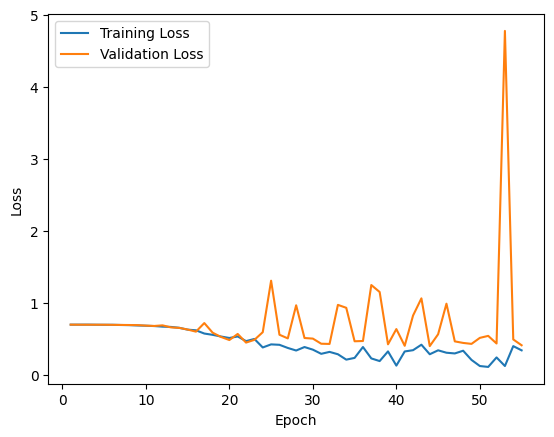

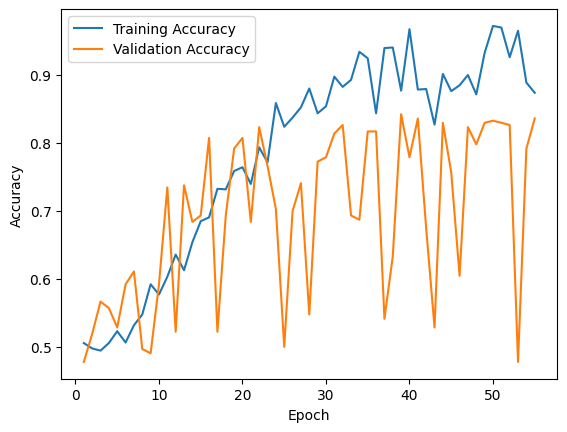

Review #1:

i picked this book up a couple days ago with a few others hoping to learn about americas prison system i think our prison system is horrible and i was hoping that this book would give me some more information on the topic unfortunately in the first twenty pages of the book elsner claims that america imprisons 704 people per every 10000 citizens if you do the math that equals 7 of our population 7 of our population is greater than the population of the state of new york according to this author there are more people in prison in this country than live in the state of new york before you get too worried let me reassure you that this is not the case america imprisons 736 people per 100000 citizens as of 506 or 736 of the population this is the highest rate in the entire world so theres no need to move the decimal point to make it seem more dramatic for comparison stalin had 771 of his citizens imprisoned in the gulags during the height of the purges again theres really no need

In [40]:
y = df['Positive Review']
X = df['Review']
X = df['Review'].str.lower()
X = X.str.translate(str.maketrans('', '', string.punctuation))
X = X.str.strip().str.replace(r'\s+', ' ', regex=True)
X_length = df['review_length'].values.reshape(-1, 1)
X_train, X_test, X_train_length, X_test_length, y_train, y_test = train_test_split(X, X_length, y, test_size=0.20)

# 1. Create a TfidfVectorizer object but this time remove words that don't add much meaning 
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english', 
    min_df=5, 
    max_features=5000,
    ngram_range=(1, 2)
)
tfidf_vectorizer.fit(X_train)

X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_combined = hstack([X_train_tfidf, X_train_length])
X_test_combined = hstack([X_test_tfidf, X_test_length])

vocabulary_size = len(tfidf_vectorizer.vocabulary_)
#X_train_combined.shape[1]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
# 1. Create model object
# YOUR CODE HERE
nn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
nn_model.add(InputLayer(input_shape=(vocabulary_size,)))

nn_model.add(Dense(64, activation='relu'))
nn_model.add(keras.layers.Dropout(0.40))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(keras.layers.Dropout(0.40))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(keras.layers.Dropout(0.40))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.summary()

#compile the model using the loss function and optimizer 
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

#code from assignment 8 to display the progress bar 
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

t0 = time.time() # start time to calculate the overall time it takes for the model 

num_epochs = 55 # epochs

X_train_tfidf = X_train_tfidf.toarray()#X_train_combined.toarray() 

logger = ProgBarLoggerNEpochs(num_epochs, every_n=5)

#fit the model with the 20% validation split and 55 epochs. 
history = nn_model.fit(
    X_train_tfidf,
    y_train,
    epochs=num_epochs,
    verbose=0,
    validation_split=0.2,
    callbacks=[logger]
)


t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred = lr_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"  Accuracy : {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall   : {recall:.4f}")
print(f"  F1 Score : {f1:.4f}")

#print graphs of the neural network 
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#see how the model performs on other reviews (also taken from unit8 assignment)
probability_predictions = nn_model.predict(X_test_tfidf.toarray())# YOUR CODE HERE


print('Review #1:\n')

print(X_test.to_numpy()[11])

goodReview = True if probability_predictions[11] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[11]))

Results: I tried using review_length as a feature, but it caused the accuracy to decrease. With a traditional neural network, the highest accuracy without training on review_length was 90%, but including review_length drastically decreased it to 51%.I also noticed that the model performed best with 50 epochs, suggesting that it might overfit after those 50.  I also ran logistic regression, and the neural network performed substantially better, which makes sense since it was probably able to capture more of the complexities in the data. 